In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import random
import numpy as np

import seaborn as sns

In [2]:
import matplotlib 
# For higher resoltion figures
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica" #somethings this one doesnt work
plt.rcParams['pdf.fonttype'] = 42

In [11]:
# TFs to look at

# Sef1
# Pdr1
# Sum1
# Oaf1
# Pip2
# Put3
# Aro80
# Stb4
# War1
# Ppr1
# Gal4

# Oaf3
# Rds1 - No syntenic genes

# Yrr1
# Tog1 --> Only a few syntenic genes, have to use Y... name
# Yrm1
# Urc2
# YJL206C
# Gln3
# YKL222C - No syntenic genes
# Haa1
# Cha4
# Rdr1 - Not many seqs
# Gat1
# Rtg3
# Aft2
# Hac1
# Cup2

TFs = [
"Sef1",
"Pdr1",
"Sum1",
"Oaf1",
"Pip2",
"Put3",
"Aro80",
"Stb4",
"War1",
"Ppr1",
"Gal4",
"Oaf3",
"Yrr1",
"Yrm1",
"Urc2",
"Gln3",
"Haa1",
"Cha4",
"Rdr1",
"Gat1",
"Rtg3",
"Aft2",
"Hac1",
"Cup2"]

In [4]:
def read_fasta(file):

    with open(file, "r") as f:
        lines = f.readlines()

    seq = ""
    seqs = []
    names = []

    for line in lines:
        if line.startswith(">"):
            names.append(line.strip().replace(">", ""))
            if len(names) > 1:
                seqs.append(seq.replace("*", ""))
                seq = ""
        else:
            seq += line.strip()

    seqs.append(seq.replace("*", ""))

    return pd.DataFrame({"name" : names, "aa_seq" : seqs})

In [5]:
def get_observed(seqs): 
    ends = []
    for seq in seqs: 
      end = seq[-1]
      ends.append(end)
    return ends

def generate_random_ends(seqs):
  permutations = []
  for i in range(1000):
    shuffled_ends = []
    for seq in seqs: 
      shuffled_end = random.sample(list(seq), len(seq))[-1]
      shuffled_ends.append(shuffled_end)
    permutations.append(shuffled_ends)
  return permutations

def percent_hydrophobic(ls):
    return (ls.count("W") + ls.count("F") + ls.count("Y") + ls.count("M") + ls.count("L") + ls.count("V") + ls.count("A") + ls.count("I")) / len(ls)

In [ ]:
# Sef1 0.0
# Pdr1 0.1913
# Sum1 0.7412
# Oaf1 0.9935
# Pip2 0.9924
# Put3 0.962
# Aro80 0.9827
# Stb4 0.0005
# War1 0.1277
# Ppr1 0.0
# Gal4 0.4531
# Oaf3 0.0492
# Yrr1 0.1616
# Yrm1 0.5425
# Urc2 0.4197
# Gln3 0.0
# Haa1 0.0004
# Cha4 0.1177
# Rdr1 0.0
# Gat1 0.0002
# Rtg3 1.0
# Aft2 0.9124
# Hac1 0.2293
# Cup2 0.0004

In [58]:
from statsmodels.stats.multitest import multipletests

for p in TF_ends_df["pval"]:
    adj_p = multipletests(p, method="bonferroni")[1]
    print(adj_p)

[1.]
[0.9827]
[0.9645]
[0.4552]
[0.7376]
[0.4078]
[0.9079]
[0.9933]
[0.9947]
[0.1094]
[0.5428]
[0.1908]
[0.225]
[0.1736]
[0.134]
[0.0005]
[0.0002]
[0.0002]
[0.0457]
[0.0001]
[0.0005]
[0.]
[0.]
[0.]


In [55]:
TF_ends_df

,index,TF,Percent hydrophobic ending amino acid,pval,opposite pval
0,20,Rtg3,0.047619,1.0000,0.0000
1,6,Aro80,0.055556,0.9827,0.0173
2,5,Put3,0.157895,0.9645,0.0355
3,10,Gal4,0.176471,0.4552,0.5448
4,2,Sum1,0.208333,0.7376,0.2624
5,14,Urc2,0.210526,0.4078,0.5922
6,21,Aft2,0.241379,0.9079,0.0921
7,3,Oaf1,0.250000,0.9933,0.0067
8,4,Pip2,0.250000,0.9947,0.0053
9,17,Cha4,0.333333,0.1094,0.8906


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


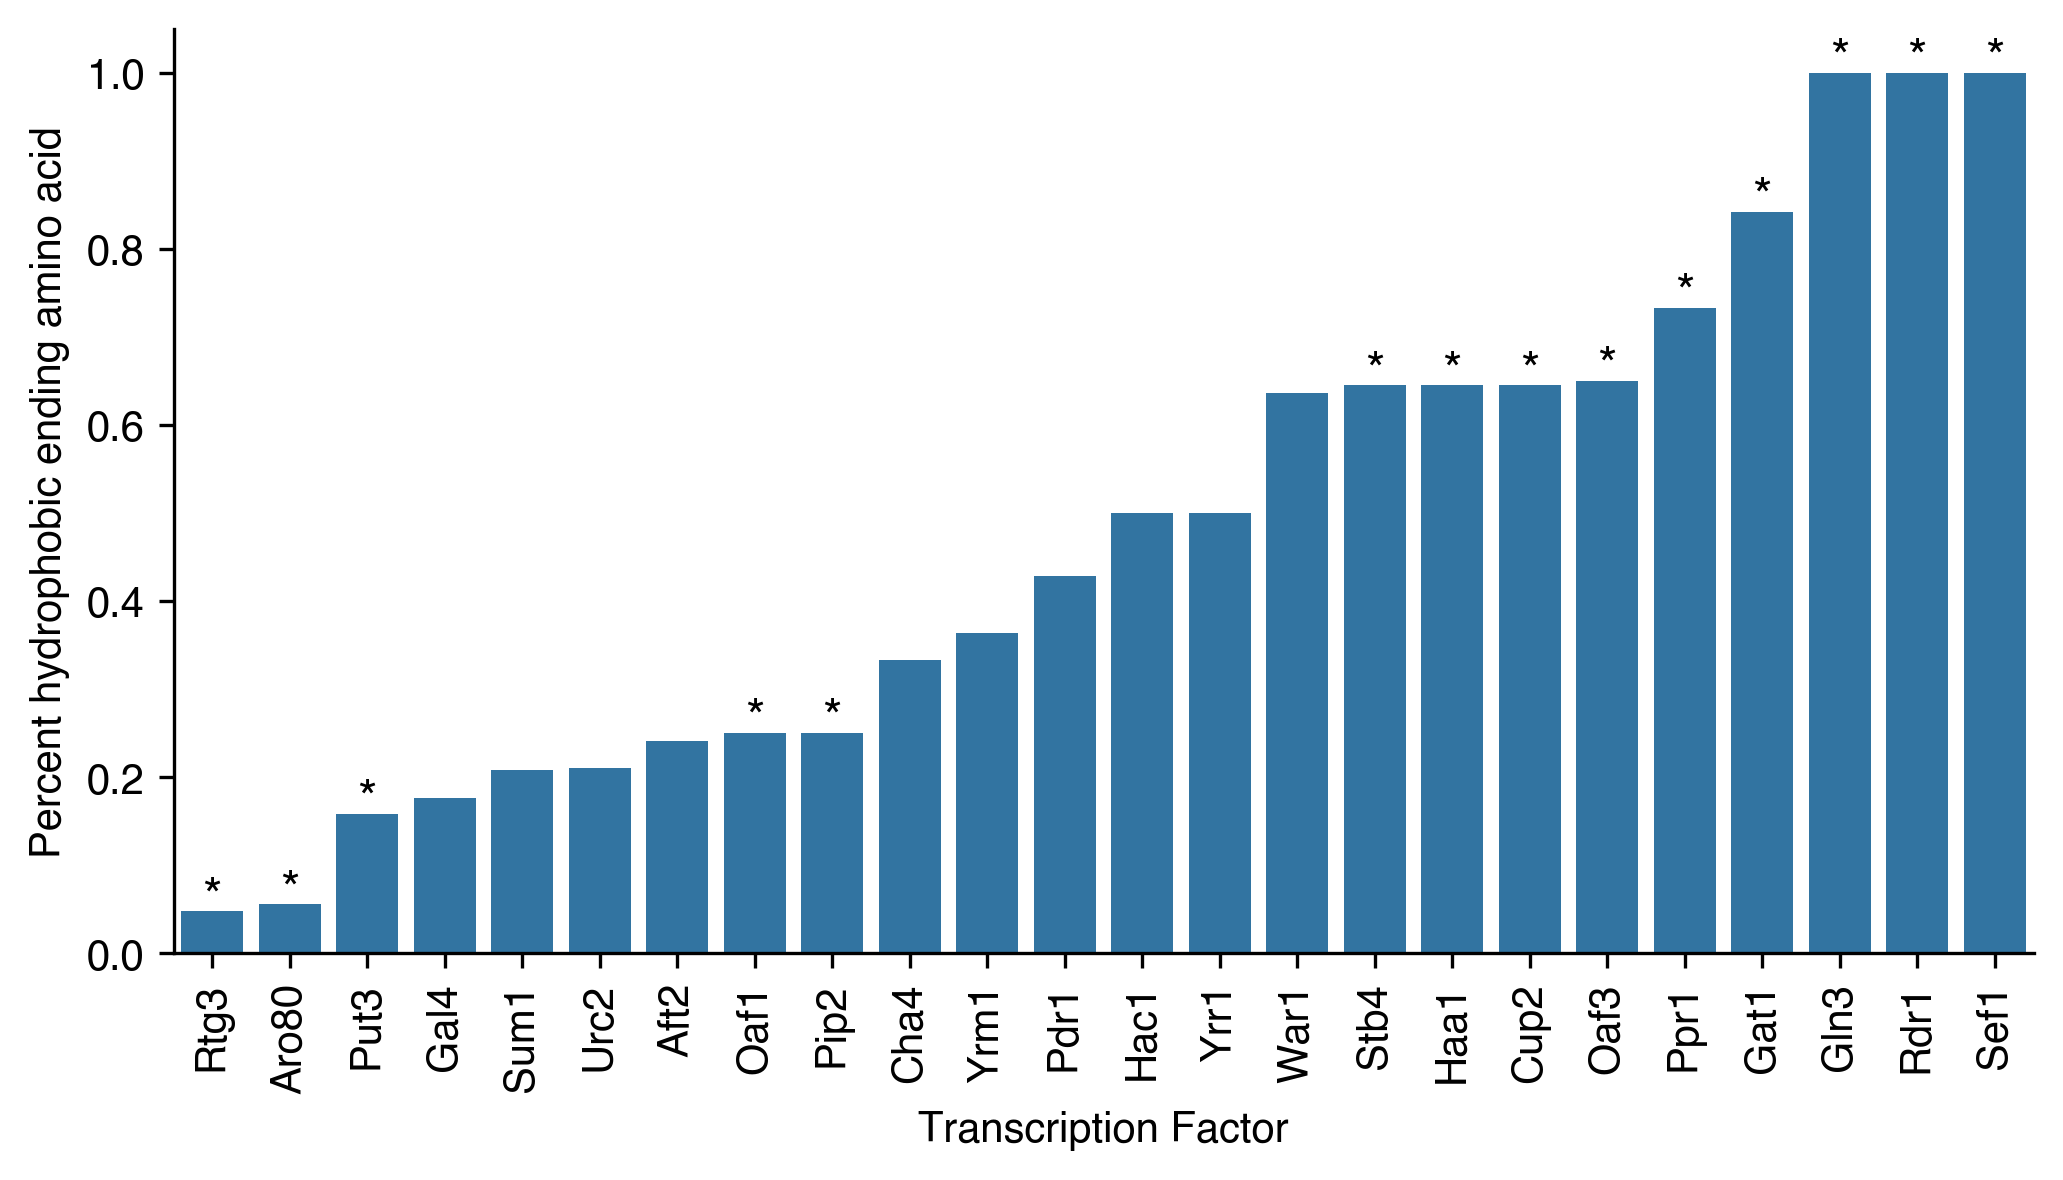

In [61]:
observed_rates = []
for TF in TFs:
    TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
    observed = percent_hydrophobic(get_observed(TF_seqs['aa_seq'].values))
    observed_rates.append(observed)

TF_ends_df = pd.DataFrame({"Transcription Factor" : TFs, "Percent hydrophobic ending amino acid" : observed_rates})
TF_ends_df["pval"] = pvals
TF_ends_df = TF_ends_df.sort_values("Percent hydrophobic ending amino acid")
TF_ends_df = TF_ends_df.reset_index()
TF_ends_df["opposite pval"] = 1 - TF_ends_df["pval"]

fig, ax = plt.subplots(figsize=(8, 4))   
bars = sns.barplot(data=TF_ends_df, y="Percent hydrophobic ending amino acid", x="Transcription Factor", ax=ax)
plt.xticks(rotation=90)

for bar in ax.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    if TF_ends_df.loc[x, "pval"] < 0.05:
        y = height #+ 0.001  # Adjust offset as needed
        ax.text(x, y, '*', ha='center', fontsize=12)
    if TF_ends_df.loc[x, "opposite pval"] < 0.05:
        y = height #+ 0.001  # Adjust offset as needed
        ax.text(x, y, '*', ha='center', fontsize=12)

sns.despine()
plt.savefig("../figures/fraction_hydrophobic_ends.png", bbox_inches='tight')
plt.savefig("../figures/fraction_hydrophobic_ends.pdf",  format='pdf', bbox_inches='tight')

In [48]:
len(TFs)

24

Total seqs: 22


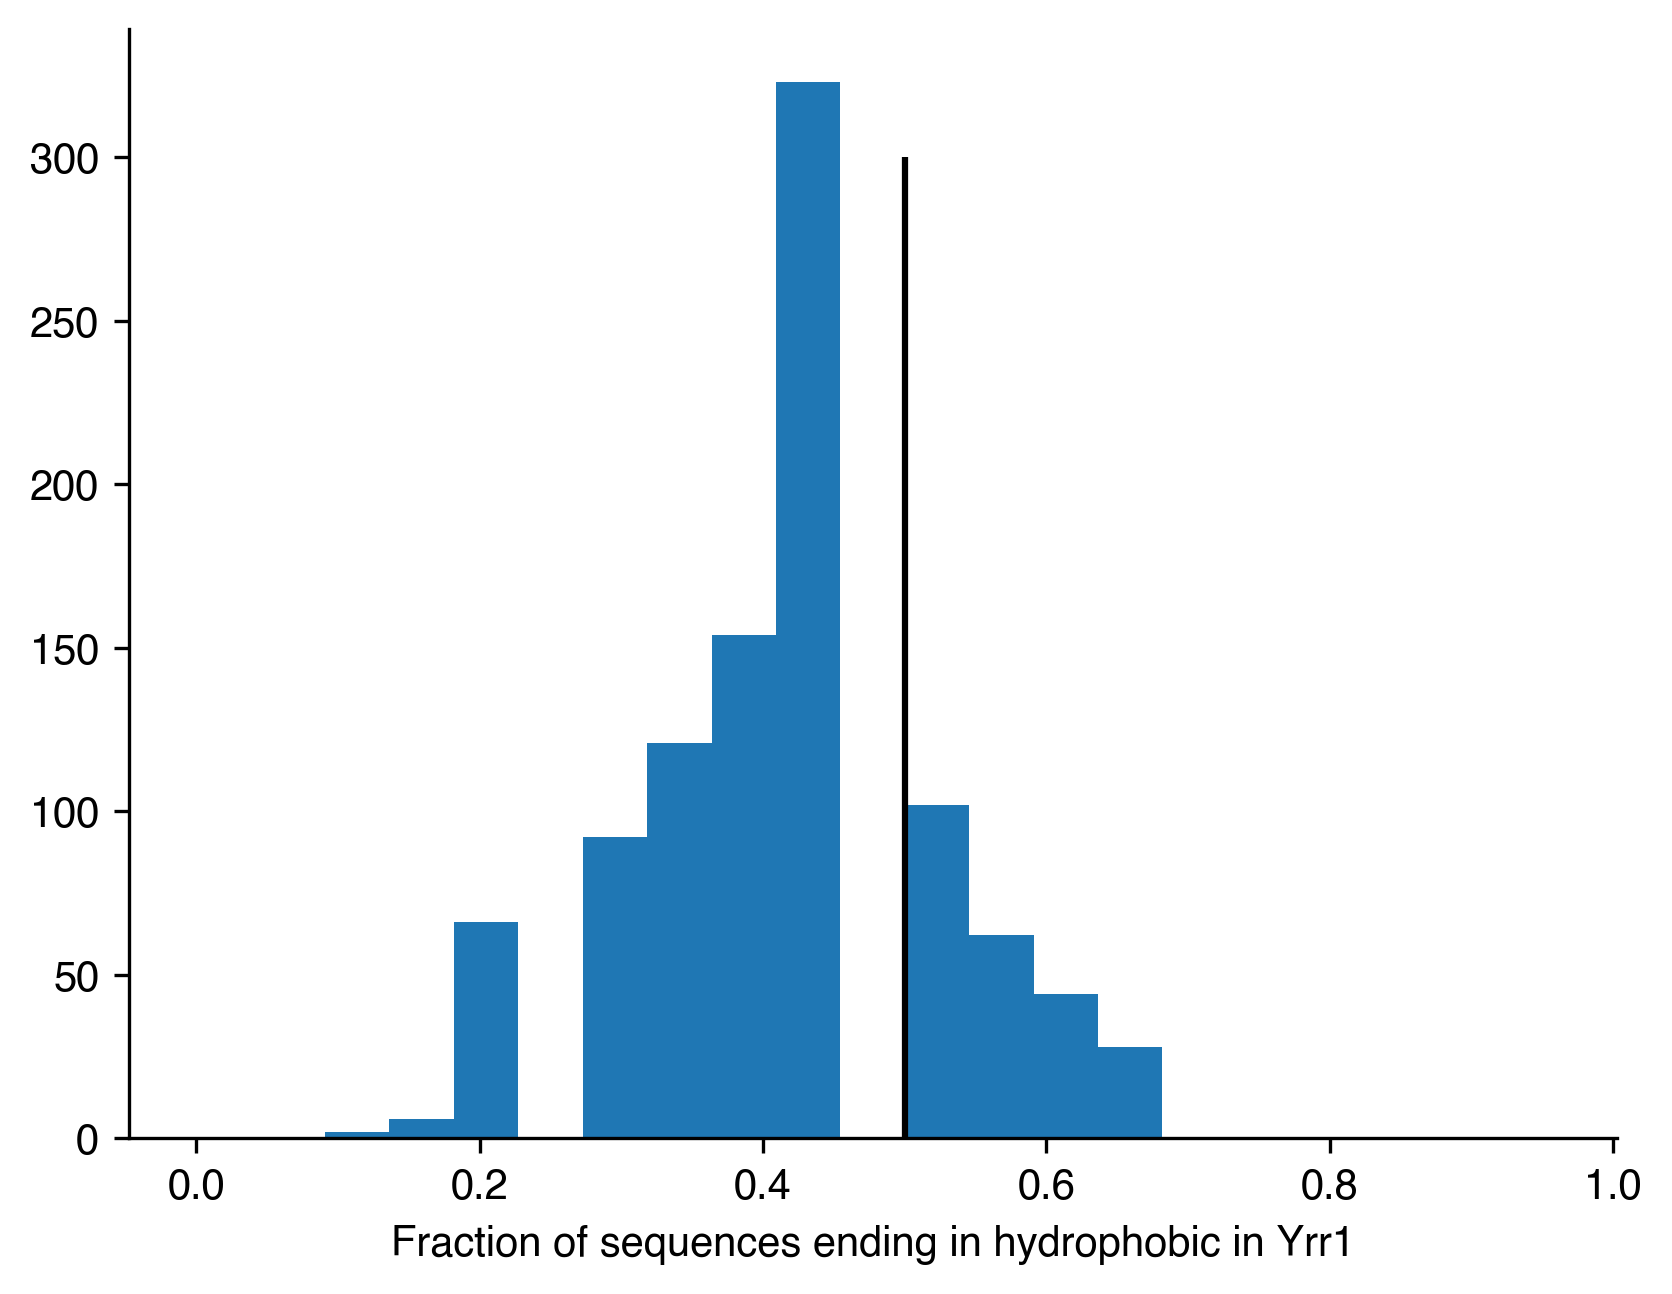

In [7]:
import numpy as np

TF = "Yrr1"
TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
print("Total seqs:", len(TF_seqs))

permutations = generate_random_ends(TF_seqs["aa_seq"].values)

observed = get_observed(TF_seqs['aa_seq'].values)

hydrophobics = []

for perm in permutations:
    hydrophobics.append(percent_hydrophobic(perm))

plt.hist(hydrophobics, bins=np.arange(0, 1, 1/len(TF_seqs)))
plt.vlines(percent_hydrophobic(observed), ymin=0, ymax=300, color="black")
plt.xlabel(f"Fraction of sequences ending in hydrophobic in {TF}")

sns.despine()

# More stringent null distribution

In [28]:
def generate_random_ends_strict(seqs):
  permutations = []
  for i in range(10000):
    shuffled_ends = []
    for seq in seqs: 
      shuffled_end = random.sample(list(seq[-10:]), 10)[-1]
      shuffled_ends.append(shuffled_end)
    permutations.append(shuffled_ends)
  return permutations

Total seqs: 19


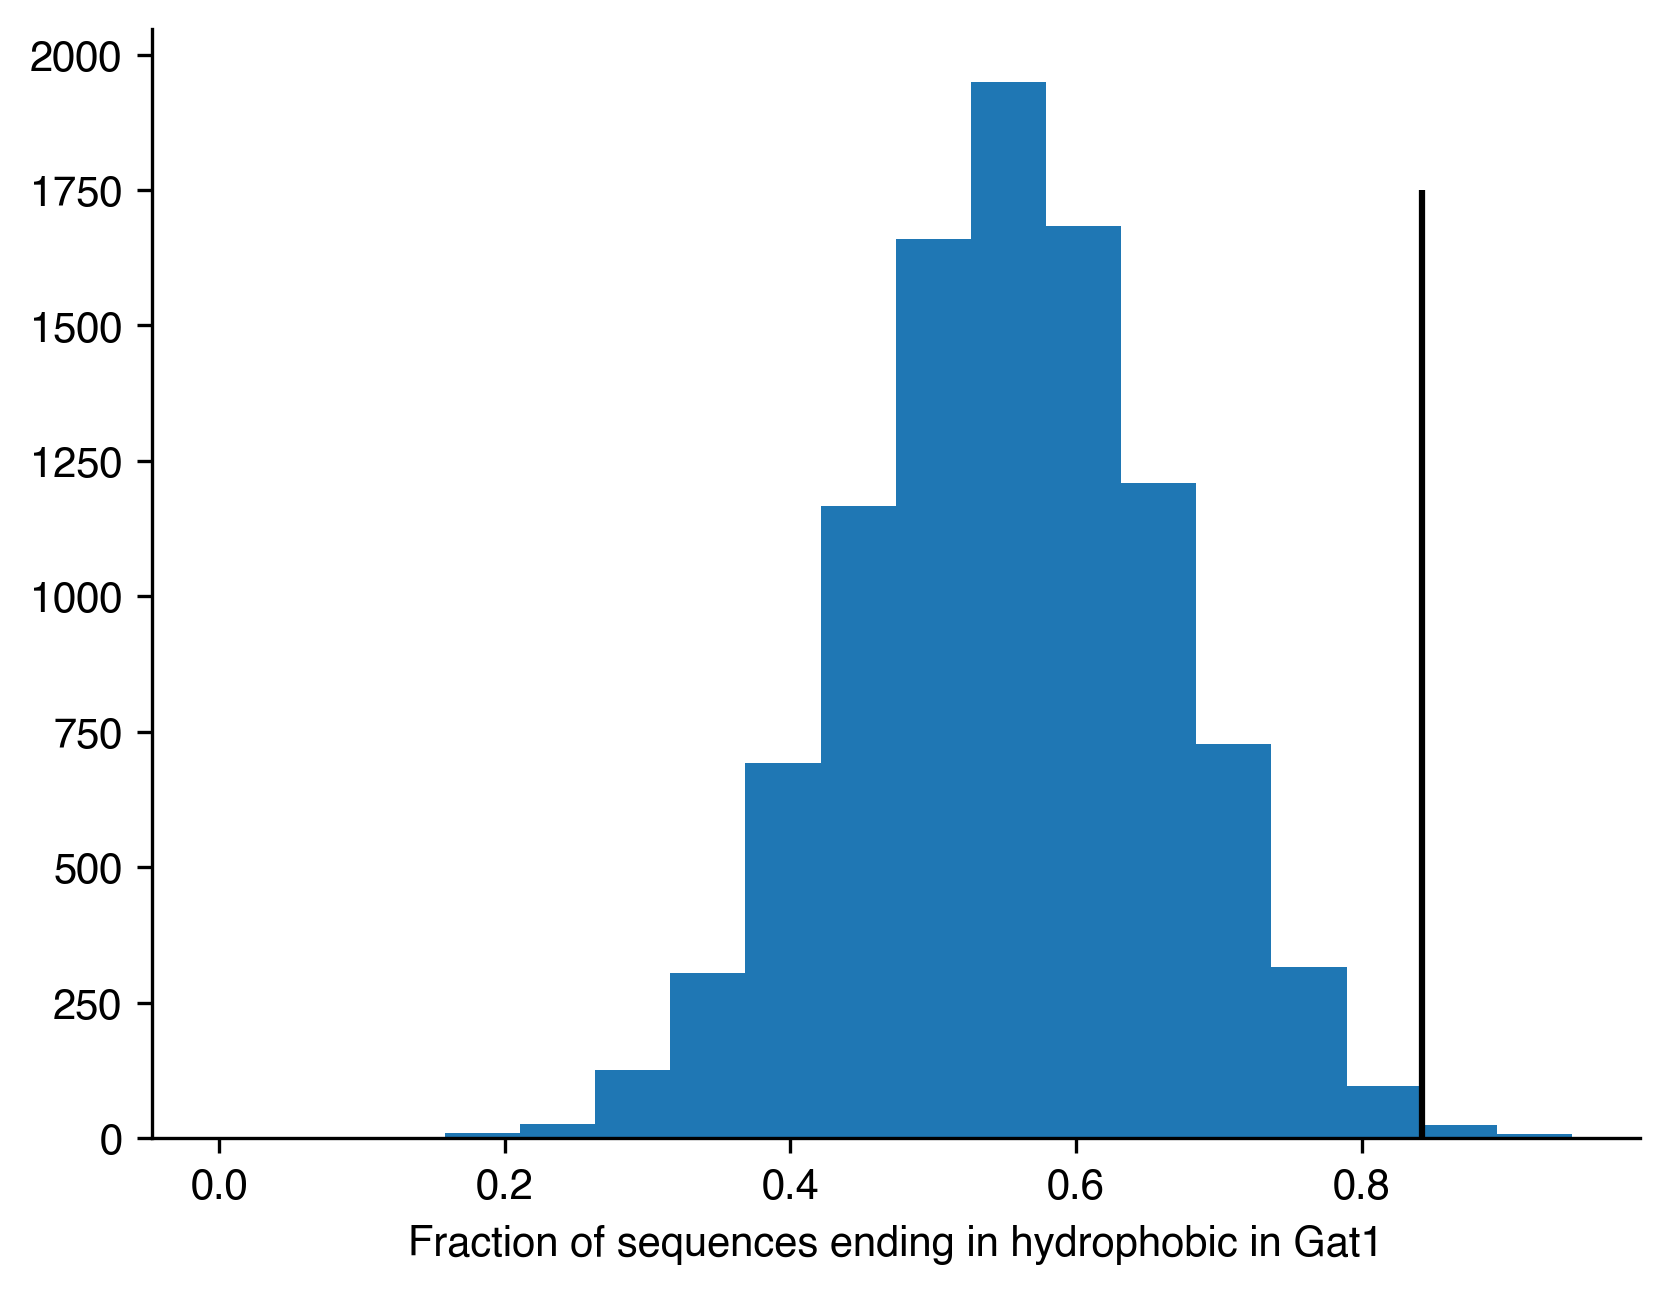

In [10]:
TF = "Gat1"
TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
print("Total seqs:", len(TF_seqs))

permutations = generate_random_ends_strict(TF_seqs["aa_seq"].values)

observed = get_observed(TF_seqs['aa_seq'].values)

hydrophobics = []

for perm in permutations:
    hydrophobics.append(percent_hydrophobic(perm))

plt.hist(hydrophobics, bins=np.arange(0, 1, 1/len(TF_seqs)))
plt.vlines(percent_hydrophobic(observed), ymin=0, ymax=1750, color="black")
plt.xlabel(f"Fraction of sequences ending in hydrophobic in {TF}")

sns.despine()

In [50]:
# Empirical p-values
pvals = []
for TF in TFs:
    TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
    # print("Total seqs:", len(TF_seqs))

    permutations = generate_random_ends_strict(TF_seqs["aa_seq"].values)

    observed = get_observed(TF_seqs['aa_seq'].values)

    hydrophobics = []

    for perm in permutations:
        hydrophobics.append(percent_hydrophobic(perm))

    pvals.append(sum([h > percent_hydrophobic(observed) for h in hydrophobics]) / 10000)
    print(TF, sum([h > percent_hydrophobic(observed) for h in hydrophobics]) / 10000)
    
    print(TF, sum([h < percent_hydrophobic(observed) for h in hydrophobics]) / 10000)

Sef1 0.0
Sef1 1.0
Pdr1 0.1908
Pdr1 0.6781
Sum1 0.7376
Sum1 0.1292
Oaf1 0.9933
Oaf1 0.0024
Pip2 0.9947
Pip2 0.0023
Put3 0.9645
Put3 0.0085
Aro80 0.9827
Aro80 0.002
Stb4 0.0005
Stb4 0.998
War1 0.134
War1 0.754
Ppr1 0.0001
Ppr1 0.9991
Gal4 0.4552
Gal4 0.2801
Oaf3 0.0457
Oaf3 0.8827
Yrr1 0.1736
Yrr1 0.6931
Yrm1 0.5428
Yrm1 0.2313
Urc2 0.4078
Urc2 0.3617
Gln3 0.0
Gln3 1.0
Haa1 0.0002
Haa1 0.9982
Cha4 0.1094
Cha4 0.751
Rdr1 0.0
Rdr1 0.9948
Gat1 0.0005
Gat1 0.9975
Rtg3 1.0
Rtg3 0.0
Aft2 0.9079
Aft2 0.0395
Hac1 0.225
Hac1 0.6233
Cup2 0.0002
Cup2 0.9984


# Making relevant figures

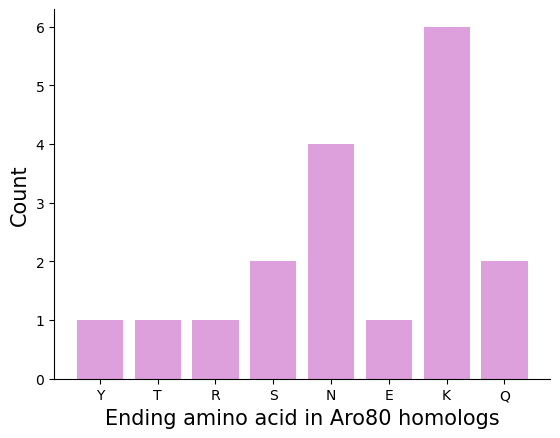

In [15]:
import seaborn as sns

TF = "Aro80"
TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
observed = get_observed(TF_seqs['aa_seq'].values)

aa_counts = {}
for aa in set(observed):
    aa_counts[aa] = observed.count(aa)

plt.bar(range(len(aa_counts.keys())), height=aa_counts.values(), tick_label=aa_counts.keys(), color='plum')
plt.xlabel("Ending amino acid in Aro80 homologs", fontsize=15)
plt.ylabel("Count", fontsize=15)
sns.despine()

plt.savefig("../figures/Aro80_ends.pdf")

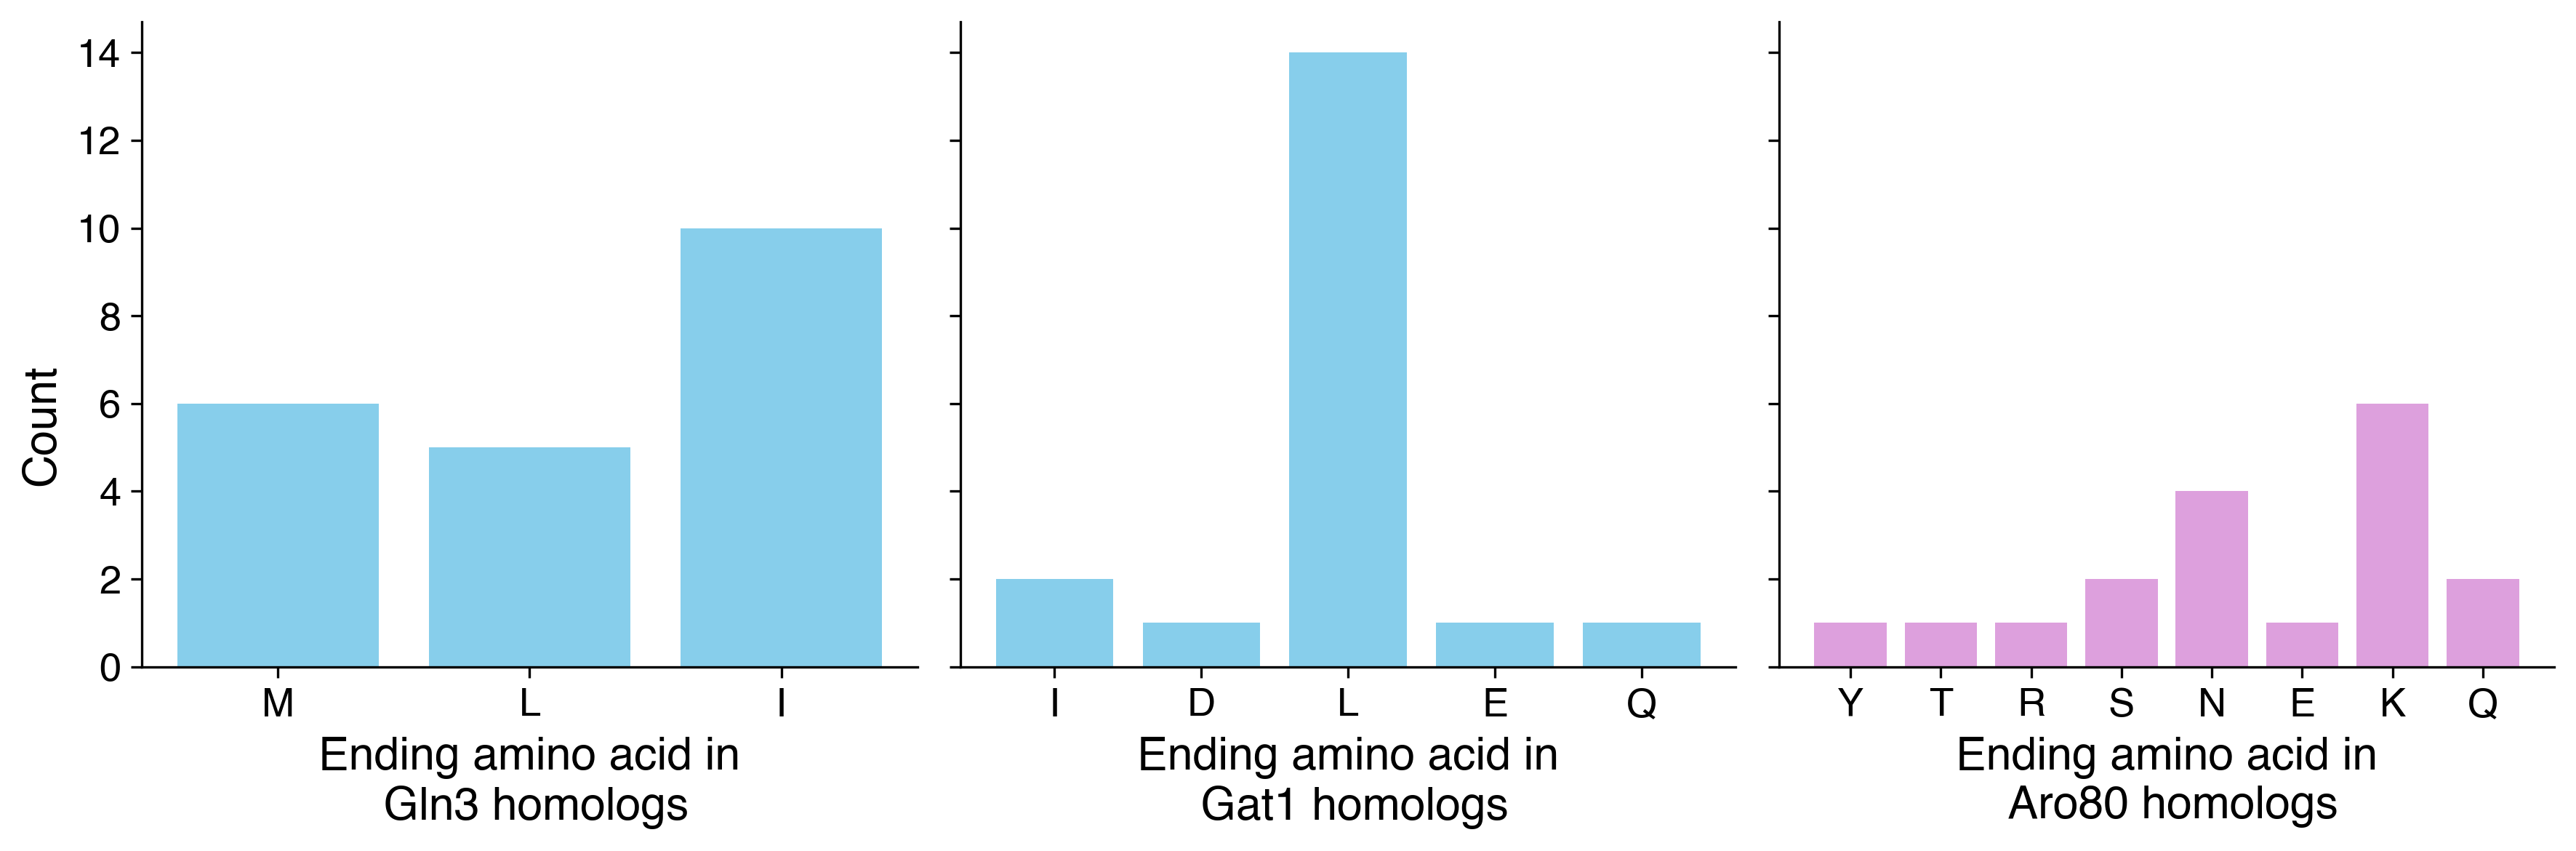

In [47]:
import seaborn as sns

fig, axs = plt.subplots(1,3, figsize=(12,4), sharey=True)
TF = "Gln3"
TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
observed = get_observed(TF_seqs['aa_seq'].values)

aa_counts = {}
for aa in set(observed):
    aa_counts[aa] = observed.count(aa)

axs[0].bar(range(len(aa_counts.keys())), height=aa_counts.values(), tick_label=aa_counts.keys(), color='skyblue')
axs[0].set_xlabel("Ending amino acid in\n Gln3 homologs", fontsize=15, weight='bold')

axs[0].tick_params(labelsize=13)
for lbl in axs[0].get_xticklabels() + axs[0].get_yticklabels():
    lbl.set_fontweight("bold")

TF = "Gat1"
TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
observed = get_observed(TF_seqs['aa_seq'].values)

aa_counts = {}
for aa in set(observed):
    aa_counts[aa] = observed.count(aa)
axs[1].bar(range(len(aa_counts.keys())), height=aa_counts.values(), tick_label=aa_counts.keys(), color='skyblue')
axs[1].set_xlabel("Ending amino acid in\n Gat1 homologs", fontsize=15, weight='bold')

axs[1].tick_params(labelsize=13)
for lbl in axs[1].get_xticklabels() + axs[1].get_yticklabels():
    lbl.set_fontweight("bold")

TF = "Aro80"
TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
observed = get_observed(TF_seqs['aa_seq'].values)

aa_counts = {}
for aa in set(observed):
    aa_counts[aa] = observed.count(aa)
axs[2].bar(range(len(aa_counts.keys())), height=aa_counts.values(), tick_label=aa_counts.keys(), color='plum')

axs[2].tick_params(labelsize=13)
for lbl in axs[2].get_xticklabels() + axs[2].get_yticklabels():
    lbl.set_fontweight("bold")

axs[2].set_xlabel("Ending amino acid in\n Aro80 homologs", fontsize=15, weight='bold')

fig.supylabel("Count", fontsize=15, weight='bold')
sns.despine()

plt.tight_layout()

# plt.savefig("../figures/Aro80_ends.pdf")

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


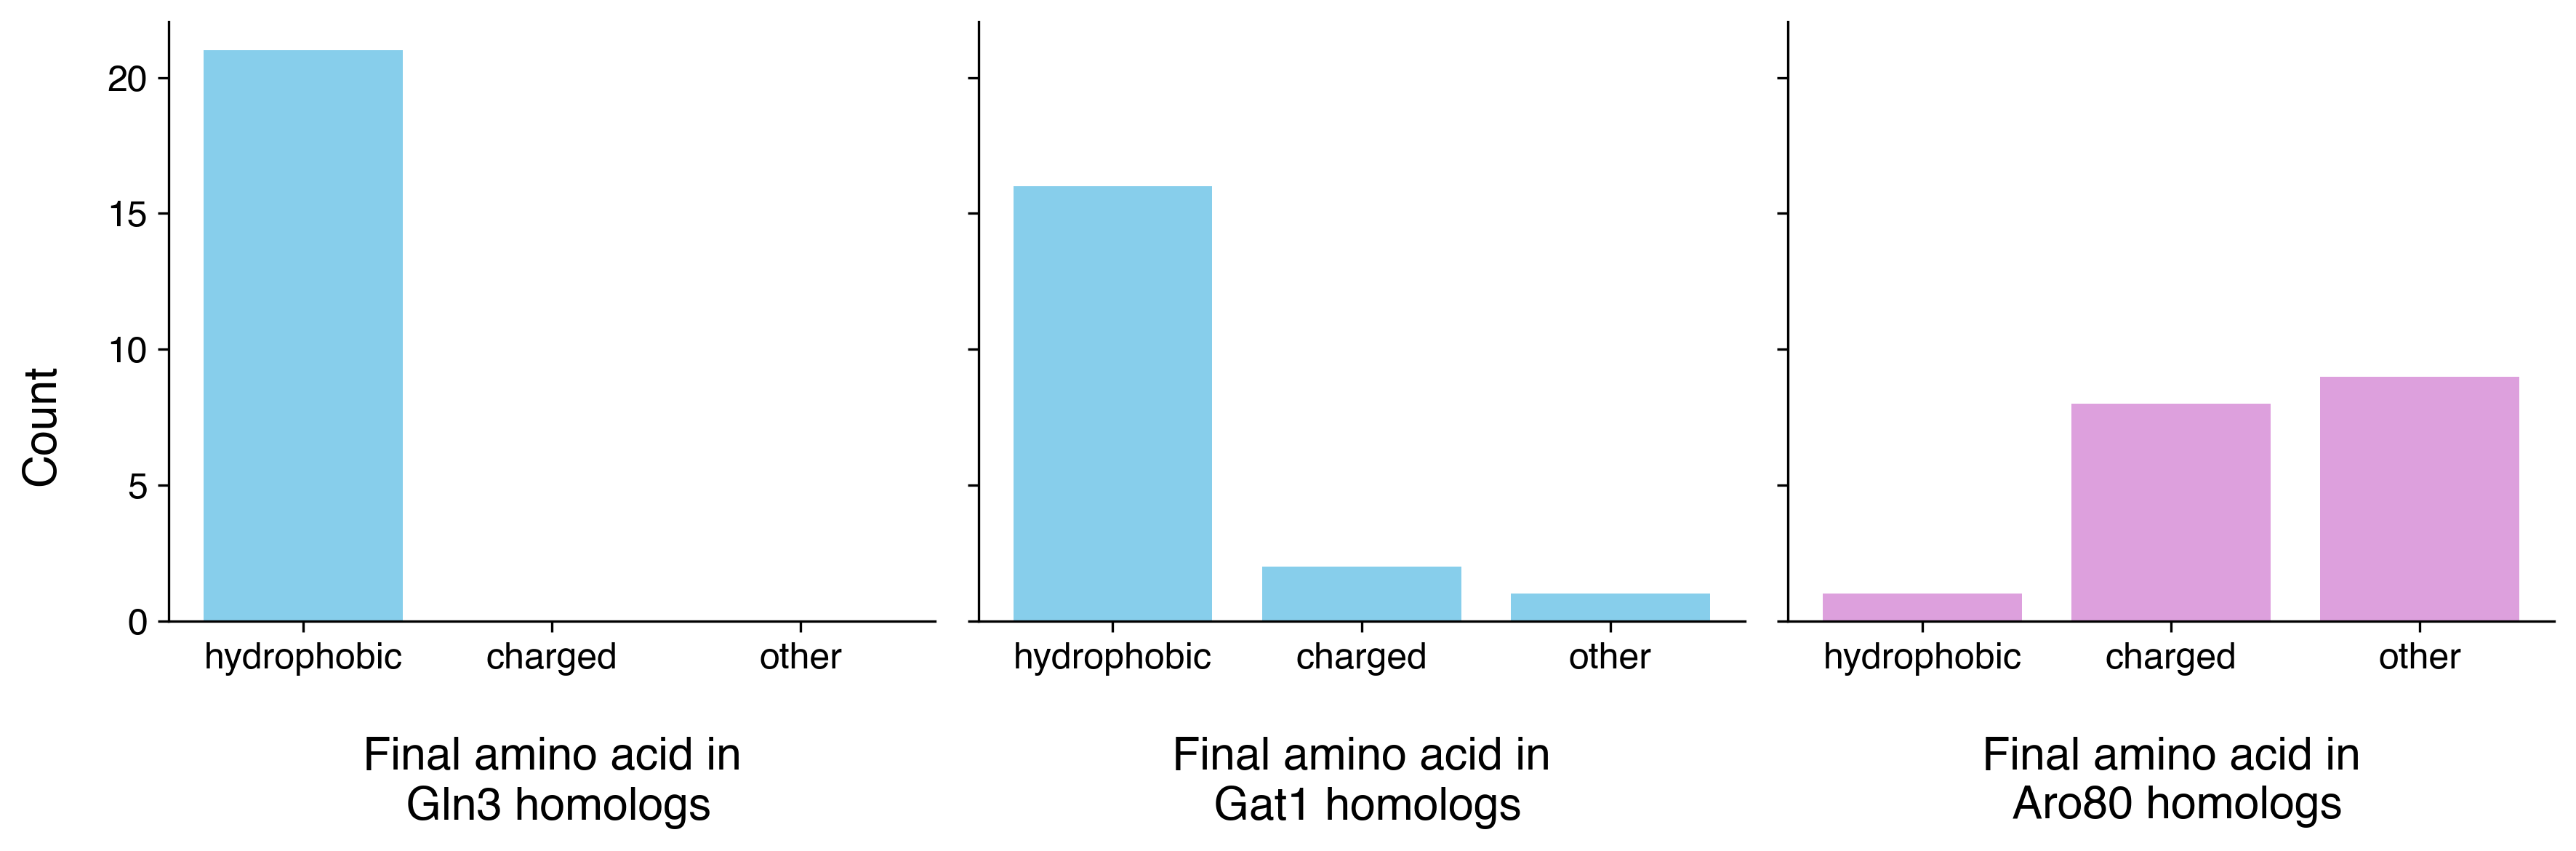

In [48]:
hydrophobics = ["W", "F", "L", "Y", "M", "I", "V", "A"]
charged = ["D", "E", "K", "R"]

fig, axs = plt.subplots(1,3, figsize=(12,4), sharey=True)
TF = "Gln3"
TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
observed = get_observed(TF_seqs['aa_seq'].values)

type_counts = {"hydrophobic" : 0, 'charged' : 0, 'other' : 0}
for aa in set(observed):
    if aa in hydrophobics:
        type_counts["hydrophobic"] += observed.count(aa)
    elif aa in charged:
        type_counts["charged"] += observed.count(aa)
    else: 
        type_counts["other"] += observed.count(aa)

axs[0].bar(range(len(type_counts.keys())), height=type_counts.values(), tick_label=type_counts.keys(), color='skyblue')
axs[0].set_xlabel("\nFinal amino acid in\n Gln3 homologs", fontsize=15, weight='bold')

axs[0].tick_params(labelsize=12)
for lbl in axs[0].get_xticklabels() + axs[0].get_yticklabels():
    lbl.set_fontweight("bold")

TF = "Gat1"
TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
observed = get_observed(TF_seqs['aa_seq'].values)

type_counts = {"hydrophobic" : 0, 'charged' : 0, 'other' : 0}
for aa in set(observed):
    if aa in hydrophobics:
        type_counts["hydrophobic"] += observed.count(aa)
    elif aa in charged:
        type_counts["charged"] += observed.count(aa)
    else: 
        type_counts["other"] += observed.count(aa)
axs[1].bar(range(len(type_counts.keys())), height=type_counts.values(), tick_label=type_counts.keys(), color='skyblue')
axs[1].set_xlabel("\nFinal amino acid in\n Gat1 homologs", fontsize=15, weight='bold')

axs[1].tick_params(labelsize=12)
for lbl in axs[1].get_xticklabels() + axs[1].get_yticklabels():
    lbl.set_fontweight("bold")

TF = "Aro80"
TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
observed = get_observed(TF_seqs['aa_seq'].values)

type_counts = {"hydrophobic" : 0, 'charged' : 0, 'other' : 0}
for aa in set(observed):
    if aa in hydrophobics:
        type_counts["hydrophobic"] += observed.count(aa)
    elif aa in charged:
        type_counts["charged"] += observed.count(aa)
    else: 
        type_counts["other"] += observed.count(aa)

axs[2].bar(range(len(type_counts.keys())), height=type_counts.values(), tick_label=type_counts.keys(), color='plum')
axs[2].set_xlabel("\nFinal amino acid in\n Aro80 homologs", fontsize=15, weight='bold')

axs[2].tick_params(labelsize=12)
for lbl in axs[2].get_xticklabels() + axs[2].get_yticklabels():
    lbl.set_fontweight("bold")

fig.supylabel("Count", fontsize=15, weight='bold')
sns.despine()

plt.tight_layout()

plt.savefig("../figures/TF_ends.pdf", format='pdf', bbox_inches='tight')